[View in Colaboratory](https://colab.research.google.com/github/huudatHust/machine-learning/blob/master/Neural_network_with_keras.ipynb)

#Import Package

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


#Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#Understand Image Data Format

In [6]:
print(X_train[0].shape)

(28, 28)


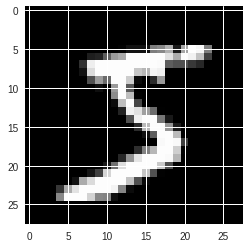

In [7]:
plt.imshow(X_train[0], cmap = 'gray')

In [8]:
y_train[0]

5

#Preprocessing Image Data

In [0]:
image_height , image_width = 28, 28

In [10]:
X_train = X_train.reshape(60000, image_height * image_width)
X_test = X_test.reshape(10000, image_height * image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [12]:
print(X_train[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [13]:
X_train /= 255.0
X_test /= 255.0
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [15]:
print(y_train.shape)
print(y_test.shape)
print(y_train[0])

(60000,)
(10000,)
5


In [16]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#Build Model

In [0]:
model = Sequential()

In [0]:
model.add(Dense(512, activation = 'relu', input_shape = (784, )))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation ='softmax'))

#Compile Model

In [0]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [21]:
784 * 512 + 512

401920

#Train the model

In [22]:
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 228us/step - loss: 0.1859 - acc: 0.9434 - val_loss: 0.1151 - val_acc: 0.9627
Epoch 2/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.0813 - acc: 0.9753 - val_loss: 0.0748 - val_acc: 0.9779
Epoch 3/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.0562 - acc: 0.9823 - val_loss: 0.0699 - val_acc: 0.9792
Epoch 4/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.0419 - acc: 0.9869 - val_loss: 0.0699 - val_acc: 0.9795
Epoch 5/20
60000/60000 [==============================] - 13s 211us/step - loss: 0.0338 - acc: 0.9899 - val_loss: 0.0729 - val_acc: 0.9801
Epoch 6/20
60000/60000 [==============================] - 13s 214us/step - loss: 0.0292 - acc: 0.9909 - val_loss: 0.0695 - val_acc: 0.9824
Epoch 7/20
60000/60000 [==============================] - 13s 210us/step - loss: 0.0259 - acc: 0.9919 - val_loss: 0.

#What is accuracy of the model ??

##Plot the accuracy of the train modle

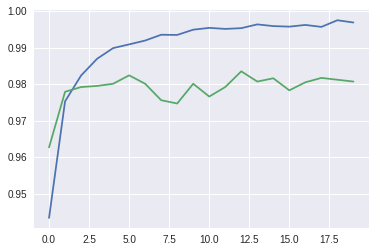

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

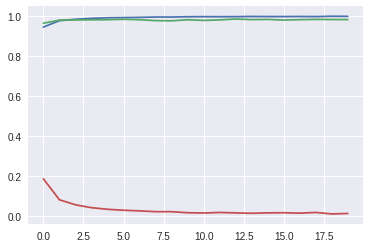

In [25]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])

##Evaluating the model

In [26]:
score = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 67us/step


In [27]:
score

[0.13883158815307556, 0.9807]